In [ ]:
#Esto es un programa de analisis de sentimientos en español
!pip install textblob spacy vaderSentiment nltk wordcloud matplotlib
!python -m textblob.download_corpora
!python -m spacy download es_core_news_sm

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If 

In [ ]:
#Importar las librerias
import re
import unicodedata
import spacy
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
#load file
from google.colab import files
uploaded = files.upload()

Saving sentiment_data.csv to sentiment_data (1).csv


In [ ]:
#Get the data from the file
#store the csv file to some variable
df = pd.read_csv('sentiment_data.csv')
print(df.head())

  month    year   fuente sentimiento  response              empresa  \
0     .  2011.0  memoria    positivo       1.0  banco internacional   
1     .  2009.0  memoria    negativo       0.0                  bci   
2     .  2018.0  memoria    positivo       1.0                  bci   
3     .  2012.0  memoria    positivo       1.0           bupa chile   
4     .  2013.0  memoria    positivo       1.0           bupa chile   

                                               texto  
0  En cuanto a las colocaciones, estas alcanzaron...  
1  En el año 2009 el mundo enfrentó una crisis fi...  
2  Es para mí motivo de gran satisfacción compart...  
3  Si tuviera que resumir la gestión 2012 de Cruz...  
4  El crecimiento anteriormente mencionado redund...  


In [ ]:
# Seleccionar solo la columna de texto y eliminar filas vacías
df = df[['texto']].dropna()


In [ ]:
# Función para limpiar el texto
def clean_text(text):
    text = str(text)  # Asegurar que sea string
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Eliminar menciones
    text = re.sub(r'#', '', text)  # Eliminar hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Eliminar RT
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Eliminar URLs
    text = re.sub(r'[^\w\s]', '', text)  # Eliminar signos de puntuación
    text = text.lower()  # Convertir a minúsculas
    text = unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('utf-8')  # Quitar acentos
    return text

In [ ]:
# Aplicar limpieza a la columna de texto
df['Cleaned_Text'] = df['texto'].apply(clean_text)

In [ ]:
# Cargar modelo en español de spaCy
nlp = spacy.load('es_core_news_sm')
analyzer = SentimentIntensityAnalyzer()

In [ ]:
#funcion para determinar la polaridad
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

#funcion para determinar la subjetividad
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
# Aplicar análisis de sentimientos
def get_sentiment(text):
    text = ' '.join([token.lemma_ for token in nlp(text)])  # Lematización
    score = analyzer.polarity_scores(text)['compound']
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'

In [ ]:
print(df.columns)

Index(['texto', 'Cleaned_Text'], dtype='object')


In [ ]:
df['Polarity'] = df['Cleaned_Text'].apply(get_polarity)
df['Subjectivity'] = df['Cleaned_Text'].apply(get_subjectivity)
df['Sentiment'] = df['Cleaned_Text'].apply(get_sentiment)

In [ ]:
# Mostrar los primeros resultados del analisis de sentimientos
print(df.head())

                                               texto  \
0  En cuanto a las colocaciones, estas alcanzaron...   
1  En el año 2009 el mundo enfrentó una crisis fi...   
2  Es para mí motivo de gran satisfacción compart...   
3  Si tuviera que resumir la gestión 2012 de Cruz...   
4  El crecimiento anteriormente mencionado redund...   

                                        Cleaned_Text  Polarity  Subjectivity  \
0  en cuanto a las colocaciones estas alcanzaron\... -0.800000      1.000000   
1  en el ano 2009 el mundo enfrento una crisis fi...  0.033333      0.266667   
2  es para mi motivo de gran satisfaccion compart... -0.533333      0.916667   
3  si tuviera que resumir la gestion 2012 de cruz...  0.000000      0.000000   
4  el crecimiento anteriormente mencionado redund...  0.000000      0.000000   

  Sentiment  
0   Neutral  
1  Negativo  
2  Positivo  
3   Neutral  
4   Neutral  


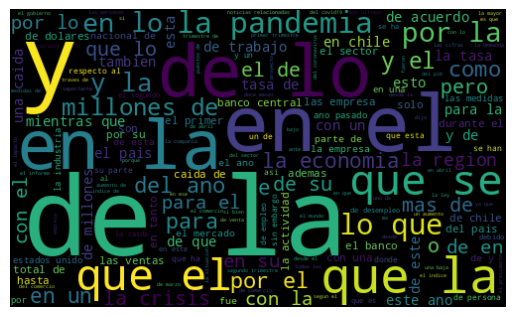

In [ ]:
# Generar una nube de palabras
all_words = ' '.join(df['Cleaned_Text'])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

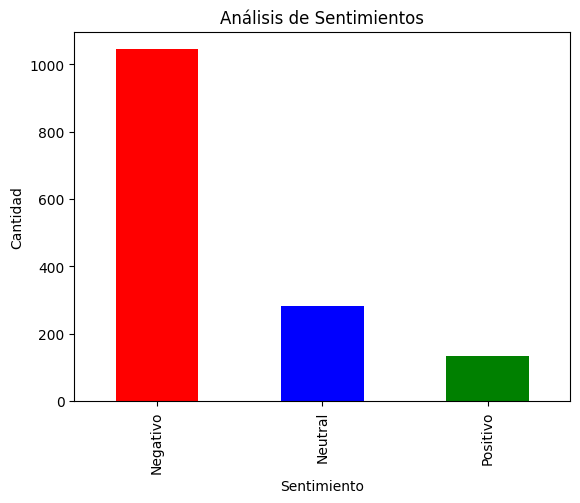

In [ ]:
# Graficar distribución de análisis de sentimientos
df['Sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Análisis de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
#Print all of the negative tweets
j=1
sortedDF = df.sort_values(by = ['Polarity'], ascending='Faslse')
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j=j+1


In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue')

  plt.title('Sentiment Analisys')
  plt.xlabel('polarity')
  plt.ylabel('subjectivity')
  plt.show

In [ ]:
#Get the porcentage of positive tweets
ptweets=df[df.Analysis == 'positive']
ptweets=ptweets['Tweets']
round( ()ptweets.shape[0] / df.shape[0]*100 , 1)

In [ ]:
#Get the porcentage of negative tweets
ntweets=df[df.Analysis == 'negative']
ntweets=ntweets['Tweets']
round( ()ntweets.shape[0] / df.shape[0]*100 , 1)

In [ ]:
#Show thw value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analisys')
plt.xlabel('sentiment')
plt.ylabel('counts')

df['Analysis'].value_counts().plot(kind='bar')
plt.show